## Bank Marketing - Logistic Regression Project - Solutions

AIM: To explain how machine Learning can help in a bank marketing campaign. The goal of our classifier is to predict using the logistic regression algorithm if a client may subscribe to a fixed term deposit. Often, more than one contact to the same client was required, in order to access if the product would be "Yes" or "No" subscribed.

This data set contains the following features:

#### Bank client data:

* Age (numeric)
* Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-        employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
* Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
* Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
* Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
* Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
* Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

#### Related with the last contact of the current campaign:

* Contact: contact communication type (categorical:'cellular','telephone')
* Month: last contact month of year (categorical: 'jan', 'feb', 'mar',…, 'nov', 'dec')
* Dayofweek: last contact day of the week (categorical:'mon','tue','wed','thu','fri')
* Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g.,   if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is     obviously known. Thus, this input should only be included for benchmark purposes andshould be discarded if the intention is     to have a realistic predictive model.

#### Other attributes:

* Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* Previous: number of contacts performed before this campaign and for this client (numeric)
* Poutcome: outcome of the previous marketing campaign (categorical:'failure','nonexistent','success')


#### Social and economic context attributes
* Emp.var.rate: employment variation rate - quarterly indicator(numeric)
* Cons.price.idx: consumer price index - monthly indicator (numeric)
* Cons.conf.idx: consumer confidence index - monthly indicator(numeric)
* Euribor3m: euribor 3 month rate - daily indicator (numeric)
* Nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
y - has the client subscribed a term deposit? (binary: 'yes', 'no')


### Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [6]:
os.listdir('../data/')


['bank-additional-full.csv',
 'bank-additional-names.txt',
 'Data Dictionary.odt']

In [7]:
bank_data = pd.read_csv('../data/bank-additional-full.csv', sep=';')

In [8]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

**Create a jointplot showing Area Income versus Age.**

In [11]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


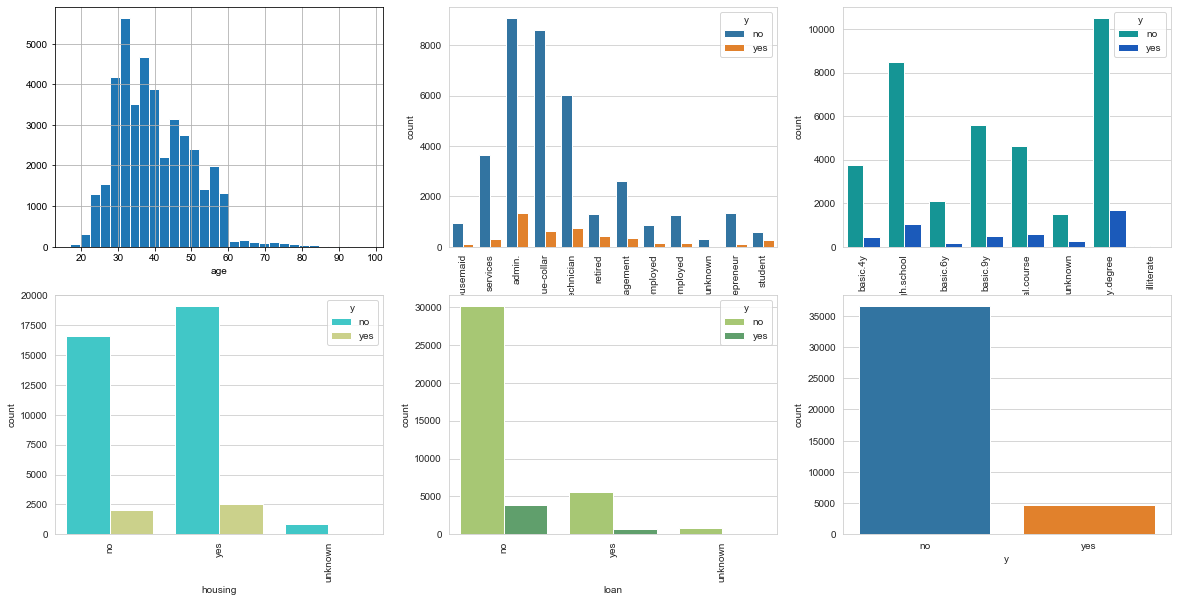

In [12]:
#Data Visualization

plt.figure(figsize=(20, 15))

plt.subplot(3,3,1)
sns.set_style('whitegrid')
bank_data['age'].hist(bins=30)
plt.xlabel('age')

plt.subplot(3,3,2)
sns.countplot(bank_data['job'],hue=bank_data['y'])
plt.xticks(rotation=90);

plt.subplot(3,3,3)
sns.countplot(bank_data['education'],hue=bank_data['y'],palette='winter_r')
plt.xticks(rotation=90);

plt.subplot(3,3,4)
sns.countplot(bank_data['housing'],hue=bank_data['y'],palette='rainbow')
plt.xticks(rotation=90);

plt.subplot(3,3,5)
sns.countplot(bank_data['loan'],hue=bank_data['y'],palette='summer_r')
plt.xticks(rotation=90);

plt.subplot(3,3,6)
sns.countplot(bank_data['y'])

plt.savefig('../images/Bank_Marketing_LR.jpg')
plt.show()

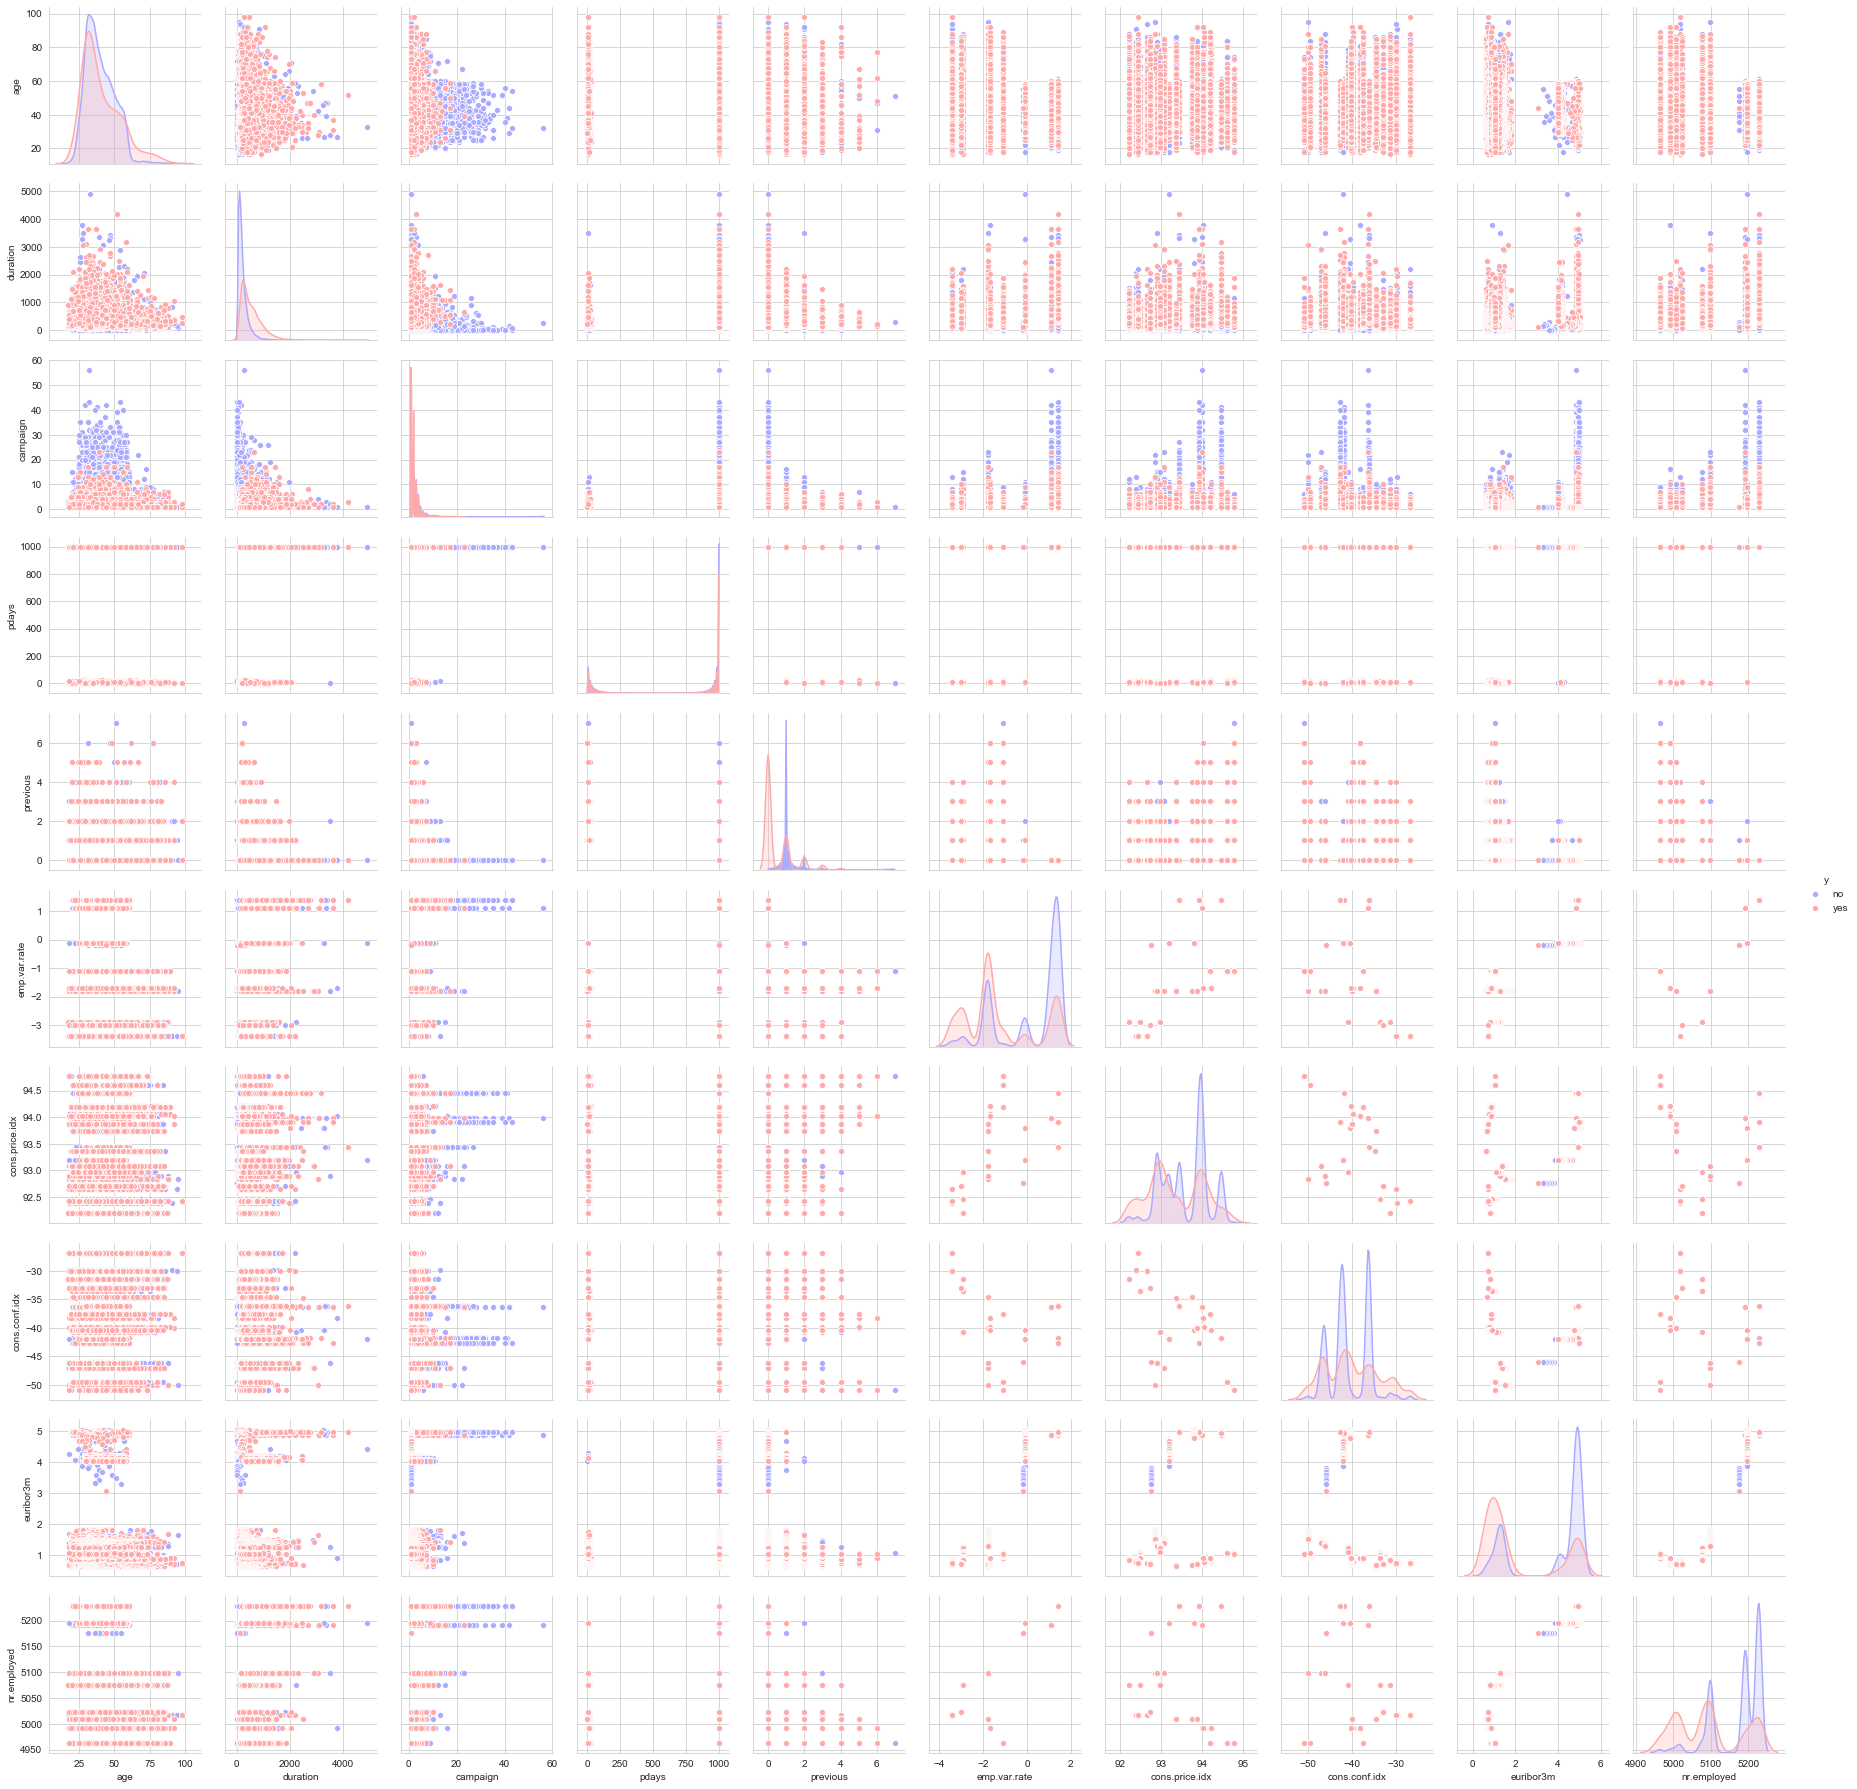

In [13]:
sns.pairplot(bank_data,hue='y',palette='bwr')
plt.savefig('../images/Pairplot.jpg')
plt.show()

### Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [16]:
X = bank_data.drop(['y'],axis=1)
X = bank_data[['age', 'duration', 'campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']]
y = bank_data['y']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

** Train and fit a logistic regression model on the training set.**

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# Save model for future use

import joblib
joblib.dump(logmodel, '../models/lm_regressor.joblib')


['../models/lm_regressor.joblib']

### Predictions and Evaluations

** Now predict values for the testing data.**

In [23]:
predictions = logmodel.predict(X_test)

C:\Users\233963\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


** Create a classification report for the model.**

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          no       0.93      0.98      0.95     12056
         yes       0.66      0.39      0.49      1537

    accuracy                           0.91     13593
   macro avg       0.79      0.68      0.72     13593
weighted avg       0.90      0.91      0.90     13593

